# ***Digit Recognizer***
**First we will import all the Libraries**
.
.
#NOTE : [ We are working in a TensorFlow backend using Keras for Convolutional Networking]

In [1]:
import pandas as pd  #Working with DataFrames
import numpy as np   # For Matrix Operations
import matplotlib.pyplot as plt # Visualization of the Data
import matplotlib.image as mpimg # Image formation from the pixels
import seaborn as sns # Visualization of Graphs
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split # Spliting the data into Traing and Validation Set
from sklearn.metrics import confusion_matrix # To check the similarity between Predictions and Answers
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential,Model # To create a Series wise CNN
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,Input  # Layers to be used in CNN(Keras) Model
from keras.optimizers import RMSprop # Optimizer which will help us finds the apt parameters
from keras.preprocessing.image import ImageDataGenerator # Creates an Augmented Image
from keras.callbacks import ReduceLROnPlateau # For preventing Overfitting an also increasing the precision



Using TensorFlow backend.


# Basic Workflow
## Data Preparation
### . Loading Data
### . Nomalizing
### . Reshaping
### . Encoding Labels
### . Test Train Split

## CNN
### . Defing the Model
### . Setting the Optimizer
### . Data Augmentation
### . Fitting the Traing Data
### . Confusion Matrix for Analysing

## Prediction
### . Predicting the Y_Test Valus
### . Submission

In [2]:
train = pd.read_csv('train.csv')

In [3]:
Y = train["label"]

In [4]:
X = train.drop(['label'],axis = 1)

In [5]:
del train

In [6]:
Y.value_counts() # This funtions counts the total number of each attribute in a Series

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [7]:
X = X/255.0

In [8]:
X.values # It is the Matrix for of a Dataframe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
X = X.values.reshape(-1,28,28,1) # This will stack 28X28 matrix one over each other

In [10]:
X.shape


(42000, 28, 28, 1)

In [11]:
Y = to_categorical(Y,num_classes=10)

In [12]:
Y.shape

(42000, 10)

In [13]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.1, random_state=random_seed)

In [14]:
c = X_train[0][:,:,0] # This gives us the matrix for the first Example

In [15]:
c.shape

(28, 28)

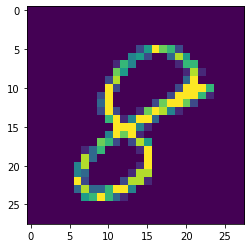

In [16]:
plt.imshow(c)# Thsi function reads values as pixels and construct an image from it

We are done with are first part of Data Formation and Arrange for the Training Test

# MODEL

Building a CNN Model
# Setting up the Model

In [17]:
def model(input_shape):
    Xinput = Input(input_shape)
    X = Conv2D(filters=32,kernel_size =(5,5),padding='Same',strides = (1,1),activation = 'relu')(Xinput)
    X = Conv2D(filters=32,kernel_size =(5,5),padding='Same',strides = (1,1),activation = 'relu')(X)
    X = MaxPool2D(pool_size = (2,2))(X)
    X = Dropout(0.25)(X)
    
    X = Conv2D(filters=32,kernel_size =(5,5),padding='Same',strides = (1,1),activation = 'relu')(X)
    X = Conv2D(filters=32,kernel_size =(5,5),padding='Same',strides = (1,1),activation = 'relu')(X)
    X = MaxPool2D(pool_size = (2,2),strides=(2,2))(X)
    X = Dropout(0.25)(X)
    
    X = Flatten()(X)
    X = Dense(256,activation = 'relu')(X)
    X = Dropout(0.5)(X)
    X = Dense(10,activation = 'softmax')(X)
    
    model = Model(inputs = Xinput,outputs = X, name = 'My_first_ConvNet')
    
    return model

# Compiling the Model


In [18]:
input_size = X_train[0][:,:].shape
Detection = model(input_size) # Creating a Model

In [19]:
Detection

In [20]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0) # Setting up an Optimizer

Detection.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"]) # Compiling the Model

In [21]:
X_train.shape

(37800, 28, 28, 1)

# Training the Model

In [22]:
epochs = 2
batch_size = 86
history = Detection.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs,validation_data = (X_val, Y_val), verbose = 1)
# Training the model


Train on 37800 samples, validate on 4200 samples
Epoch 1/2
37800/37800 [==============================] - 103s 3ms/step - loss: 0.2462 - accuracy: 0.9207 - val_loss: 0.0645 - val_accuracy: 0.9814
Epoch 2/2
37800/37800 [==============================] - 131s 3ms/step - loss: 0.0710 - accuracy: 0.9798 - val_loss: 0.0617 - val_accuracy: 0.9840


Test Data

In [23]:
test = pd.read_csv('test.csv')

In [24]:
X_test = test.values

In [25]:
X_test = X_test.reshape(-1,28,28,1)

In [26]:
y_pred = Detection.predict(X_test)

In [27]:
y_pred

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [28]:
y_pred.shape

(28000, 10)

In [29]:
prediction = np.argmax(y_pred,axis = 1)

In [30]:
prediction

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [31]:
prediction = prediction.reshape([28000,1])

In [32]:
check = X_test[13][:,:,0]

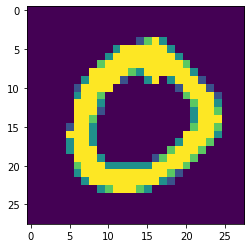

In [33]:
plt.imshow(check)

In [34]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
prediction.shape

(28000, 1)

In [36]:
ImageID = np.arange(28000)

In [37]:
ImageID

array([    0,     1,     2, ..., 27997, 27998, 27999])

In [38]:
ImageID = ImageID +1

In [39]:
ImageID = ImageID.reshape([28000,1])

In [40]:
ImageID

array([[    1],
       [    2],
       [    3],
       ...,
       [27998],
       [27999],
       [28000]])

In [41]:
final = np.concatenate([ImageID,prediction],axis = 1)

In [42]:
final

array([[    1,     2],
       [    2,     0],
       [    3,     9],
       ...,
       [27998,     3],
       [27999,     9],
       [28000,     2]], dtype=int64)

In [43]:
sub = pd.DataFrame({'ImageID': final[:, 0], 'label': final[:, 1]})

In [44]:
sub['label'].value_counts()

1    3115
2    2944
8    2839
3    2795
9    2789
7    2773
0    2767
6    2729
4    2716
5    2533
Name: label, dtype: int64

In [45]:
sub.to_csv('Prediction1.csv') # FINAL ANSWER AFTER A BASIC MODEL

# Analyzing Data

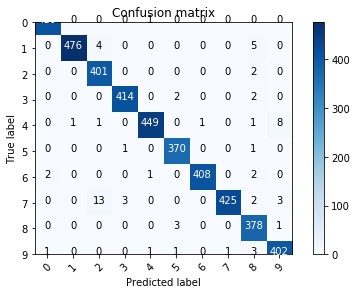

In [46]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = Detection.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [47]:
Y.shape

(42000, 10)

In [48]:
X.shape

(42000, 28, 28, 1)

In [49]:
Y_check = Detection.predict(X)

In [50]:
Y_check.shape

(42000, 10)

In [51]:
error = np.max((Y - Y_check),axis = 1)

In [52]:
x = np.argmax(Y_check,axis =1)

In [53]:
x

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [54]:
ans = np.argmax(Y,axis = 1)

In [55]:
ans

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [56]:
b = (ans - x) != 0 

In [57]:
b

array([False, False, False, ..., False, False, False])

In [58]:
sum(b)

566

In [59]:
((42000-518)/42000)*100

98.76666666666667

# Loading a Saved Model


We use the same example more than 1 time , but each time with some different Orientation or Look

In [60]:
from sklearn.externals import joblib 


C:\Users\SHALIN\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [61]:
joblib.dump(Detection, 'number.pkl') 

['number.pkl']

In [62]:
knn_from_joblib = joblib.load('number.pkl')  

In [64]:
knn_from_joblib.predict(X_test[0:2])

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [66]:
check = X_test[0:2]

In [70]:
check = check.reshape([2,784])
np.savetxt("check.csv",check, delimiter=",")

In [71]:
check.shape

(2, 784)